## DATA

In [1]:
proc = [1, 2, 4, 8, 16, 32]
sizes = [512, 1024, 2048, 4096]
seqTime = [50.003, 388.730, 3768.356, 50192.182]
commTime = {
    512: [1.674681, 11.206590, 16.922512, 32.924253, 148.222790, 174.169211
          ],
    1024: [4.030184, 19.815538, 32.914310, 51.866337, 199.891284, 300.292535
           ],
    2048: [13.511889, 70.904731, 67.533221, 138.074651, 123.805203, 275.721030
           ],
    4096: [54.562895, 114.210136, 251.198126, 406.719612, 244.012867, 474.394116
           ]
}
compTime = {
	512: [50.461275, 25.225144, 12.566901, 6.344639, 3.223668, 1.710644
	      ],
	1024: [387.597033, 195.856201, 101.572801, 60.452539, 38.215937, 12.898068
	       ],
	2048: [3819.322627, 2941.665213, 1335.798456, 707.863888, 338.441502, 139.956284
	       ],
	4096: [51104.039326, 25485.75474, 11896.659449, 6237.871031, 3085.359583, 1654.710260
           ]
}

In [2]:
import matplotlib.pyplot as plt
import math

## Computation time over processors

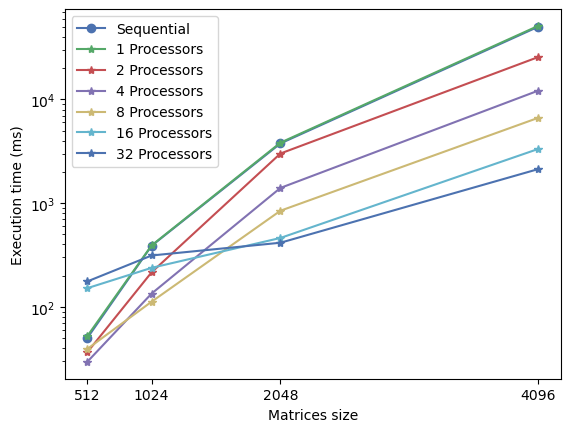

In [3]:
colors = ['darkturquoise', 'orangered', 'springgreen', 'cornflowerblue', 'mediumorchid']
plt.style.use('seaborn-v0_8-deep')

plt.plot(sizes, seqTime, marker='o', label=f'Sequential')
for i in range(0, len(proc)):
	plt.plot(sizes, [compTime[e][i] + commTime[e][i] for e in sizes], marker='*', label=f'{proc[i]} Processors')


plt.xticks(sizes, sizes)
plt.yscale('log')
plt.xlabel("Matrices size")
plt.ylabel("Execution time (ms)")
plt.legend()
plt.savefig("time_size")

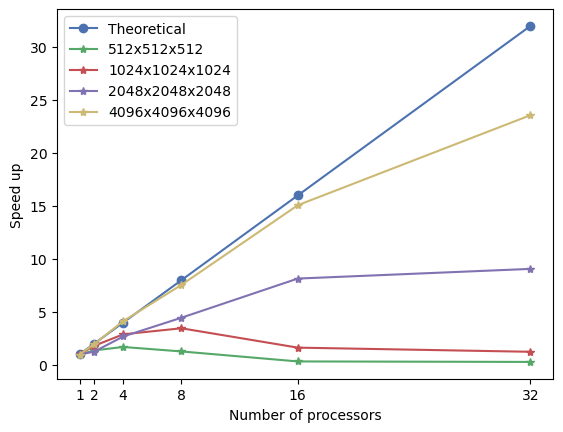

In [4]:
plt.plot(proc, proc, marker='o', label=f'Theoretical')
j = 0
for s in sizes:
    sComm = commTime[s]
    sComp = compTime[s]
    S = []
    i = 0
    for p in proc:
        S.append(seqTime[j] / (sComp[i] + sComm[i]))
        i+=1
    plt.plot(proc, S, marker='*', label=f'{s}x{s}x{s}')
    j+=1
plt.xticks(proc, proc)
plt.xlabel("Number of processors")
plt.ylabel("Speed up")
plt.legend()
plt.savefig(f'speedup')

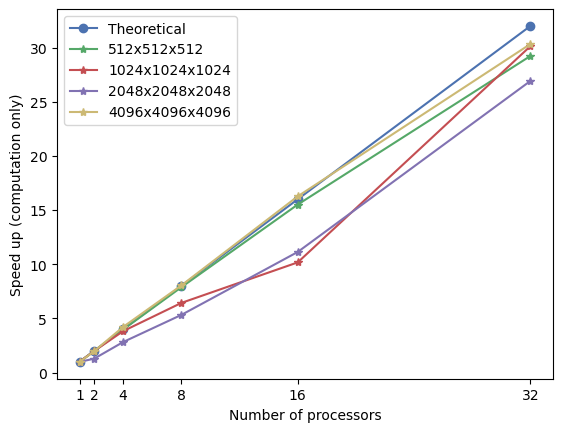

In [7]:
plt.plot(proc, proc, marker='o', label=f'Theoretical')
j = 0
for s in sizes:
    sComm = commTime[s]
    sComp = compTime[s]
    S = []
    i = 0
    for p in proc:
        S.append(seqTime[j] / (sComp[i]))
        i+=1
    plt.plot(proc, S, marker='*', label=f'{s}x{s}x{s}')
    j+=1
plt.xticks(proc, proc)
plt.xlabel("Number of processors")
plt.ylabel("Speed up (computation only)")
plt.legend()
plt.savefig(f'speedup_comp')

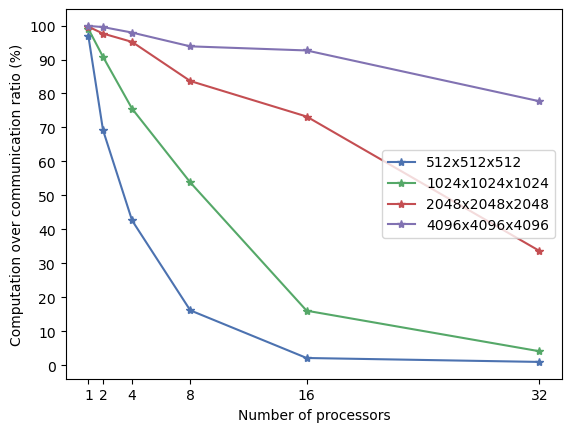

In [6]:
for s in sizes:
    sComm = commTime[s]
    sComp = compTime[s]
    S = []
    i = 0
    for p in proc:
        S.append(sComp[i] / (sComp[i] + sComm[i]))
        i+=1
    plt.plot(proc, S, marker='*', label=f'{s}x{s}x{s}')
    
plt.xticks(proc, proc)
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylabel("Computation over communication ratio (%)")
plt.xlabel("Number of processors")
plt.legend()
plt.savefig(f'comp_over_comm')